## This notebook contains following steps:
- Importing Dataframe
- Task 4.10: Part one
  - Step 2: PII
  - Step 3: regional segmentation of the data
  - Step 4: Exclusion flag
  - Step 5: Customer profiling
  - Step 6: Visualising customer profiling
  - Step 7: Aggregation customer profiling
  - Step 8: Comparing customer profile with region and Expenditure
  - Answering remaining key questions

    

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Dataframe

In [2]:
# Creating path
path =r'/Users/parvinrahimi/Desktop/Data/Data Immersion/Achievement 4/TASK 3/06-2023 Instacart Basket Analysis 9.46.07 AM'

In [3]:
# Importing dataframes
df_1 = pd.read_pickle(os.path.join(path, '01 Project Management', 'Prepared Data','final_data.pkl'))

In [4]:
df_1.head()

,user_id,first_name,surname,gender,state,age,date_joined,fam_status,income,order_id,...,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_last_order,order_frequency_flag,number_of_dependants
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,married,165665,2543867,...,Regularly busy,Busiest days,Most_orders,8,New customer,7.988889,Low spender,19.0,Regular customer,3
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,married,165665,1285508,...,Regularly busy,Regularly busy,Most_orders,8,New customer,7.988889,Low spender,19.0,Regular customer,3
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,married,165665,2578584,...,Regularly busy,Busiest days,Most_orders,8,New customer,7.988889,Low spender,19.0,Regular customer,3
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,married,165665,423547,...,Regularly busy,Regularly busy,Most_orders,8,New customer,7.988889,Low spender,19.0,Regular customer,3
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,married,165665,2524893,...,Regularly busy,Least busiest days,Most_orders,8,New customer,7.988889,Low spender,19.0,Regular customer,3


In [5]:
df_1.dtypes

user_id                    object
first_name                 object
surname                    object
gender                     object
state                      object
age                         int64
date_joined                object
fam_status                 object
income                      int64
order_id                    int64
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
last_order_in_days        float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
price_range_loc            object
busiest_day                object
Busiest_days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
average_price             float64
spending_flag              object
median_days_la

## Part 1: Task 4.9

### Step 2: addressing PII 

#### In order to avoid privacy issues I decided to remove 2 columns: first_name and surname

In [ ]:
# dropping columns
df_1 = df_1.drop(columns = ['first_name', 'surname'], axis = 1)

In [ ]:
df_1.shape

### Step 3: Regional segmentagtion of the data

In [ ]:
# create a new column Region
result = []

for value in df_1["state"]:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    result.append("North East")
  elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
    result.append("West")
  elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    result.append("Midwest")
  else:
    result.append("South")

In [ ]:
# add column as 'region'
df_1['region'] = result

In [ ]:
# checking the frequencies of the new column
df_1['region'].value_counts(dropna =False)

In [ ]:
df_1.shape

In [ ]:
# changing the type of column user_id to string
df_1['region'] = df_1['region'].astype('str')

In [ ]:
#check if the data was changed
df_1['region'].dtype

In [ ]:
df_1.head()

#### The column has been added and the number of rows are identical with number of rows in the original data.

### Determining if there is a difference in spending habits across regions:

In [ ]:
# creating crosstab
crosstab_region = pd.crosstab(df_1['region'], df_1['spending_flag'], dropna = False)

In [ ]:
# printing crosstab
crosstab_region

In [ ]:
# creating stacked bar chart to determine the relationship
bar_regional_habits = crosstab_region.plot.bar(column=["region", "spending_flag"], stacked=True)

plt.title('Spending Habits across Regions')
plt.legend(title='Spending Flag')
plt.xlabel('Regions')
plt.ylabel('Spending Habit')

#### As shown on the stack bar, we can see, that in all regions the "High Spenders" are very marginal.

In [ ]:
# exporting bar chart
bar_regional_habits.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_regional_habits.png'))

In [ ]:
# saving crosstab as csv
crosstab_region.to_clipboard()

### Step 4: Exclusion Flag for low activity

In [ ]:
# create a new column customer_activity
df_1.loc[df_1['max_order'] < 5, 'customer_activity'] = 'Low'
df_1.loc[df_1['max_order'] >= 5, 'customer_activity'] = 'High' 

In [ ]:
# checking the frequencies of the new column
df_1['customer_activity'].value_counts(dropna =False)

In [ ]:
# creating new dataframe with "Low" activity customers
df_low_activity = df_1[df_1['customer_activity'] == 'Low']

In [ ]:
# checking the frequencies of the shape of the new data
df_low_activity.shape

In [ ]:
# exporting the dataframe
df_low_activity.to_pickle(os.path.join(path, '01 Project Management', 'Prepared Data', 'low_activity_customers.pkl'))

In [ ]:
# removing low activity customers
high_activity_customers= df_1[df_1['customer_activity'] == 'High']

In [8]:
high_activity_customers.shape

NameError: name 'high_activity_customers' is not defined

In [ ]:
# exporting the dataframe
high_activity_customers.to_pickle(os.path.join(path, '01 Project Management', 'Prepared Data', 'high_activity_customers.pkl'))

### Step 5:Customer Profiling

In [7]:
# Importing dataframes
df_3= pd.read_pickle(os.path.join(path, '01 Project Management', 'Prepared Data','high_activity_customers.pkl'))

In [ ]:
# changing the name of the data
df_3=high_activity_customers

In [9]:
df_3.shape

(30964564, 32)

In [ ]:
df_3.head()

#### I decided to create a falg of age-income-dependant variable for following groups:

- young high income parent: >25 & <=40 years; income >=100000; at least 2 dependants
- single high income: <=40 years; income >=100000; no dependants
- low income parent: income <100000; at least 2 dependants
- single low income: <40 years; income <100000
- not categoriesed: every body else

#### The reason why the customer profile is limited to theses groups is beacause, I am interested in finding out if spending habit among the young customers is income relevant.

In [12]:
# create a new variable based on age/income/number of dependants

def age_income_dependant_var(row):

  if (row['age'] > 25) and (row['age'] <= 40) and (row['income'] >= 100000) and (row['number_of_dependants'] > 1):
    return 'young high income parent'
  elif (row['age'] <= 40) and (row['income'] >= 100000) and (row['number_of_dependants'] == 0):
    return 'single high income'
  elif (row['income'] < 100000) and (row['number_of_dependants'] >= 2):
    return 'low income parent'
  elif (row['age'] < 40) and (row['income'] < 100000) and (row['number_of_dependants'] ==0):
    return 'single low income'
  else: return 'not categorised'

In [13]:
#adding variable to dataframe
df_3['age_income_dependant_var'] = df_3.apply(age_income_dependant_var, axis=1)

In [14]:
# checking the frequencies of the new column
df_3['age_income_dependant_var'].value_counts(dropna =False)

not categorised             19787699
low income parent            8391358
single low income            2572985
young high income parent      121618
single high income             90904
Name: age_income_dependant_var, dtype: int64

#### Single high income customers comprise the lowest number of customers.
#### Low Income Parents are the second highest group in number.

In [17]:
df_3.head()

,user_id,gender,state,age,date_joined,fam_status,income,order_id,order_number,orders_day_of_week,...,max_order,loyalty_flag,average_price,spending_flag,median_days_last_order,order_frequency_flag,number_of_dependants,region,customer_activity,age_income_dependant_var
0,26711,Female,Missouri,48,1/1/2017,married,165665,2543867,5,1,...,8,New customer,7.988889,Low spender,19.0,Regular customer,3,Midwest,High,not categorised
1,26711,Female,Missouri,48,1/1/2017,married,165665,1285508,7,5,...,8,New customer,7.988889,Low spender,19.0,Regular customer,3,Midwest,High,not categorised
2,26711,Female,Missouri,48,1/1/2017,married,165665,2578584,8,1,...,8,New customer,7.988889,Low spender,19.0,Regular customer,3,Midwest,High,not categorised
3,26711,Female,Missouri,48,1/1/2017,married,165665,423547,2,2,...,8,New customer,7.988889,Low spender,19.0,Regular customer,3,Midwest,High,not categorised
4,26711,Female,Missouri,48,1/1/2017,married,165665,2524893,3,3,...,8,New customer,7.988889,Low spender,19.0,Regular customer,3,Midwest,High,not categorised


In [18]:
# exporting the dataframe
df_3.to_pickle(os.path.join(path, '01 Project Management', 'Prepared Data', 'last_data_step_5.pkl'))

### Step 6: Creating visualisations

In [3]:
# Importing dataframes
df_4 = pd.read_pickle(os.path.join(path, '01 Project Management', 'Prepared Data','last_data_step_5.pkl'))

In [4]:
# Importing dataframes
df_5 = pd.read_csv(os.path.join(path, '01 Project Management', 'Prepared Data','departments_wrangled.csv'))

In [5]:
# exporting the dataframe as pickle
df_5.to_pickle(os.path.join(path, '01 Project Management', 'Prepared Data', 'departments_wrangled.pkl'))

In [31]:
# Importing dataframe
df_5 = pd.read_pickle(os.path.join(path, '01 Project Management', 'Prepared Data','departments_wrangled.pkl'))

In [47]:
df_5.head(30)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [48]:
df_5.dtypes

department_id     int64
department       object
dtype: object

In [49]:
#renaming column Unnamed: 0
df_5.rename (columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [51]:
df_5.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [52]:
# inner joing dataframes
dep_data_merged = df_5.merge(df_4, on = 'department_id', indicator = True)

In [53]:
dep_data_merged.head()

,department_id,department,user_id,gender,state,age,date_joined,fam_status,income,order_id,...,loyalty_flag,average_price,spending_flag,median_days_last_order,order_frequency_flag,number_of_dependants,region,customer_activity,age_income_dependant_var,_merge
0,1,frozen,33890,Female,New Mexico,36,1/1/2017,single,59285,122641,...,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,0,West,High,single low income,both
1,1,frozen,33890,Female,New Mexico,36,1/1/2017,single,59285,1987968,...,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,0,West,High,single low income,both
2,1,frozen,65803,Male,Idaho,35,1/1/2017,married,99568,3114332,...,New customer,8.375962,Low spender,7.0,Frequent customer,2,West,High,low income parent,both
3,1,frozen,65803,Male,Idaho,35,1/1/2017,married,99568,142275,...,New customer,8.375962,Low spender,7.0,Frequent customer,2,West,High,low income parent,both
4,1,frozen,65803,Male,Idaho,35,1/1/2017,married,99568,3114332,...,New customer,8.375962,Low spender,7.0,Frequent customer,2,West,High,low income parent,both


In [54]:
dep_data_merged.shape

(30964564, 35)

In [55]:
# dropping column _merge 
dep_data_merged = dep_data_merged.drop (columns = ['_merge'])

In [56]:
dep_data_merged.shape

(30964564, 34)

In [57]:
# exporting the dataframe
dep_data_merged.to_pickle(os.path.join(path, '01 Project Management', 'Prepared Data', 'dep_data_merged.pkl'))

#### is there a relationship btw income_age_dependant variable and ordering hour?
#### is there a relationship btw income_age_dependant variable and items bought?

In [59]:
# reducing the dataframe to the columns we need
df_visual = dep_data_merged[['user_id','region','order_hour_of_day','department','spending_flag','customer_activity','age_income_dependant_var']]

In [60]:
df_visual.head()

,user_id,region,order_hour_of_day,department,spending_flag,customer_activity,age_income_dependant_var
0,33890,West,16,frozen,Low spender,High,single low income
1,33890,West,14,frozen,Low spender,High,single low income
2,65803,West,12,frozen,Low spender,High,low income parent
3,65803,West,13,frozen,Low spender,High,low income parent
4,65803,West,12,frozen,Low spender,High,low income parent


In [61]:
# grouping the data by age_income_dependant_var
df_visual_dep = df_visual.groupby(['department']).agg({'age_income_dependant_var':'value_counts'})

In [62]:
df_visual_dep

age_income_dependant_var
department age_income_dependant_var                          
alcohol    not categorised                              92290
           low income parent                            37864
           single low income                            11606
           young high income parent                      1763
           single high income                            1104
...                                                       ...
snacks     not categorised                            1683116
           low income parent                           836195
           single low income                           230437
           young high income parent                      9534
           single high income                            7124

[105 rows x 1 columns]

In [63]:
# grouping the data by age_income_dependant_var
df_visual_hour = df_visual.groupby(['age_income_dependant_var']).agg({'order_hour_of_day': 'value_counts'})

In [64]:
df_visual_hour

order_hour_of_day
age_income_dependant_var order_hour_of_day                   
low income parent        10                            734200
                         11                            720057
                         14                            695715
                         13                            686516
                         15                            681950
...                                                       ...
young high income parent 5                                363
                         1                                361
                         2                                265
                         4                                148
                         3                                140

[120 rows x 1 columns]

In [65]:
# crosstab of department_id
crosstab_2 = pd.crosstab(df_visual['department'], df_visual['age_income_dependant_var'], dropna = False)

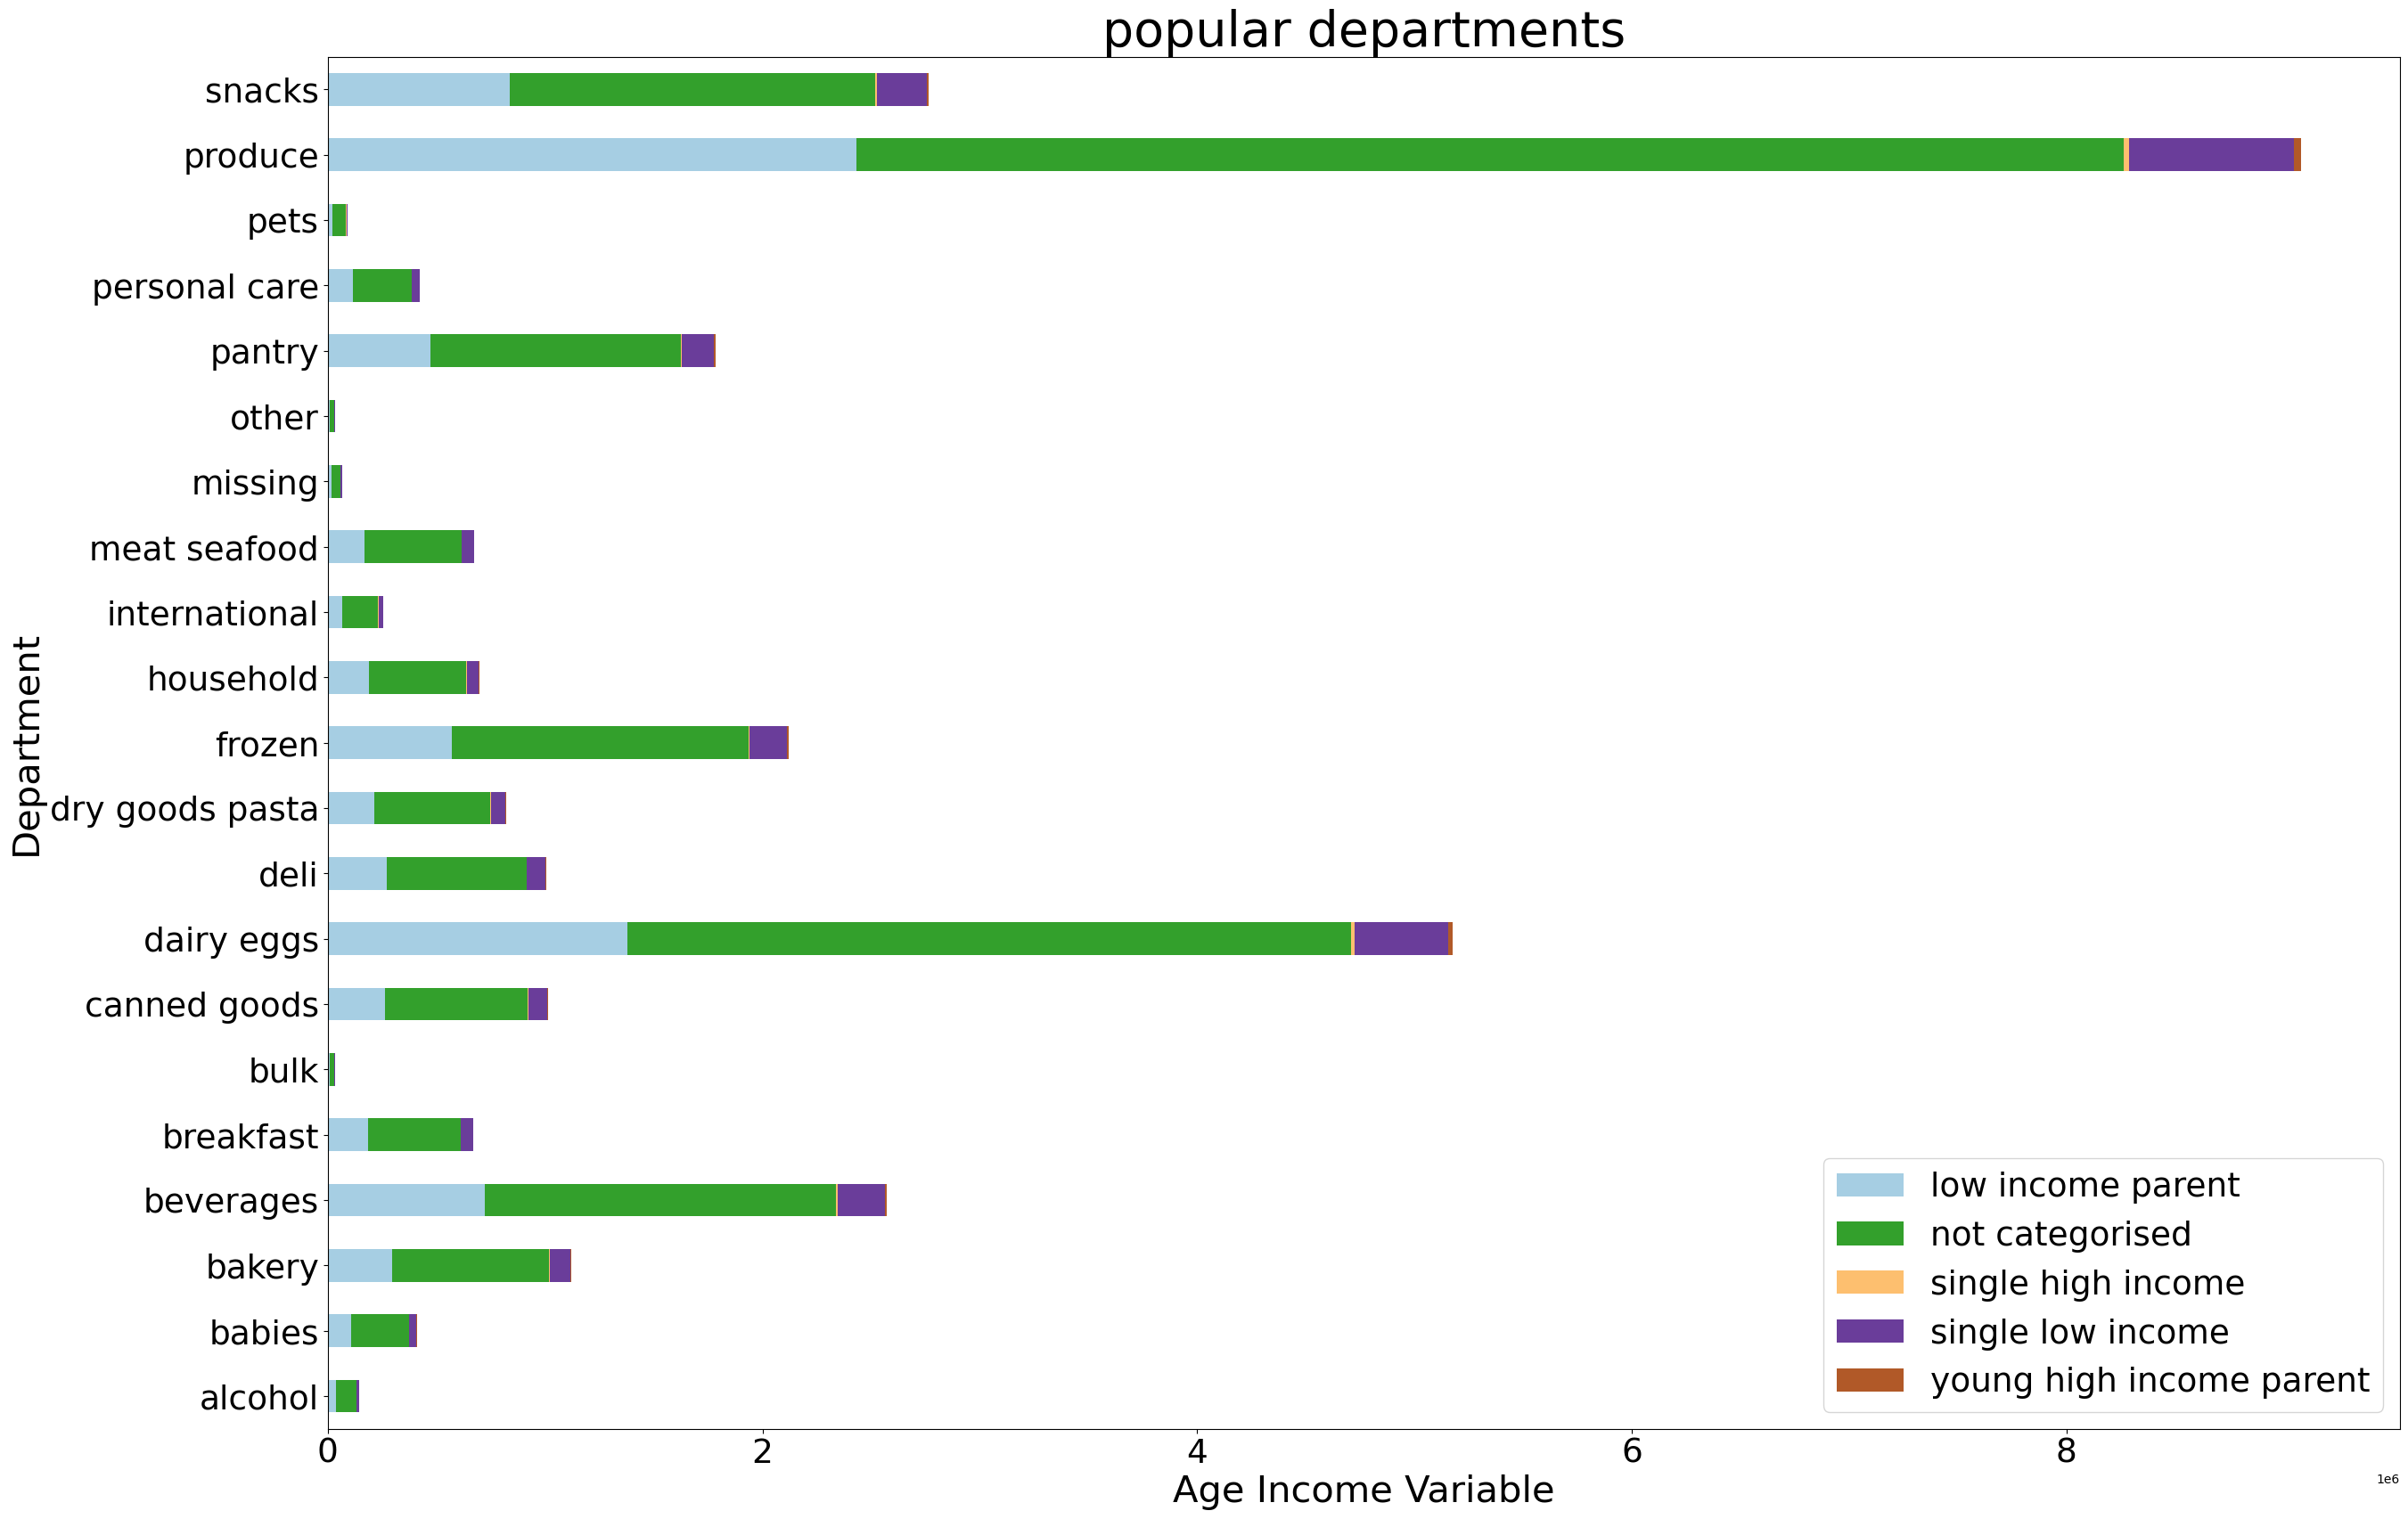

In [73]:
# visualise the relationship btw age_income_dependant_var and items bought
dep_visual_bar = crosstab_2.plot.barh(column=["department", "age_income_dependant_var" ], stacked=True,
    figsize=(30,20),
    colormap='Paired',
    fontsize=27)
plt.title('popular departments', fontsize=40)
plt.xlabel('Age Income Variable', fontsize = 30)
plt.ylabel('Department', fontsize = 30)
plt.legend (fontsize = 27)
plt.show()

#### Low income parents spend more on dairy, egg, produce and snacks!
#### Single low income customers are also surprisingly among to 3 spenders on the same products as the low income parents.

In [74]:
# exporting bar chart
dep_visual_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'dep_visual_bar.png'))

In [75]:
# crosstab of order_hour_of_day
crosstab_3 = pd.crosstab(df_visual['order_hour_of_day'], df_visual['age_income_dependant_var'], dropna = False)

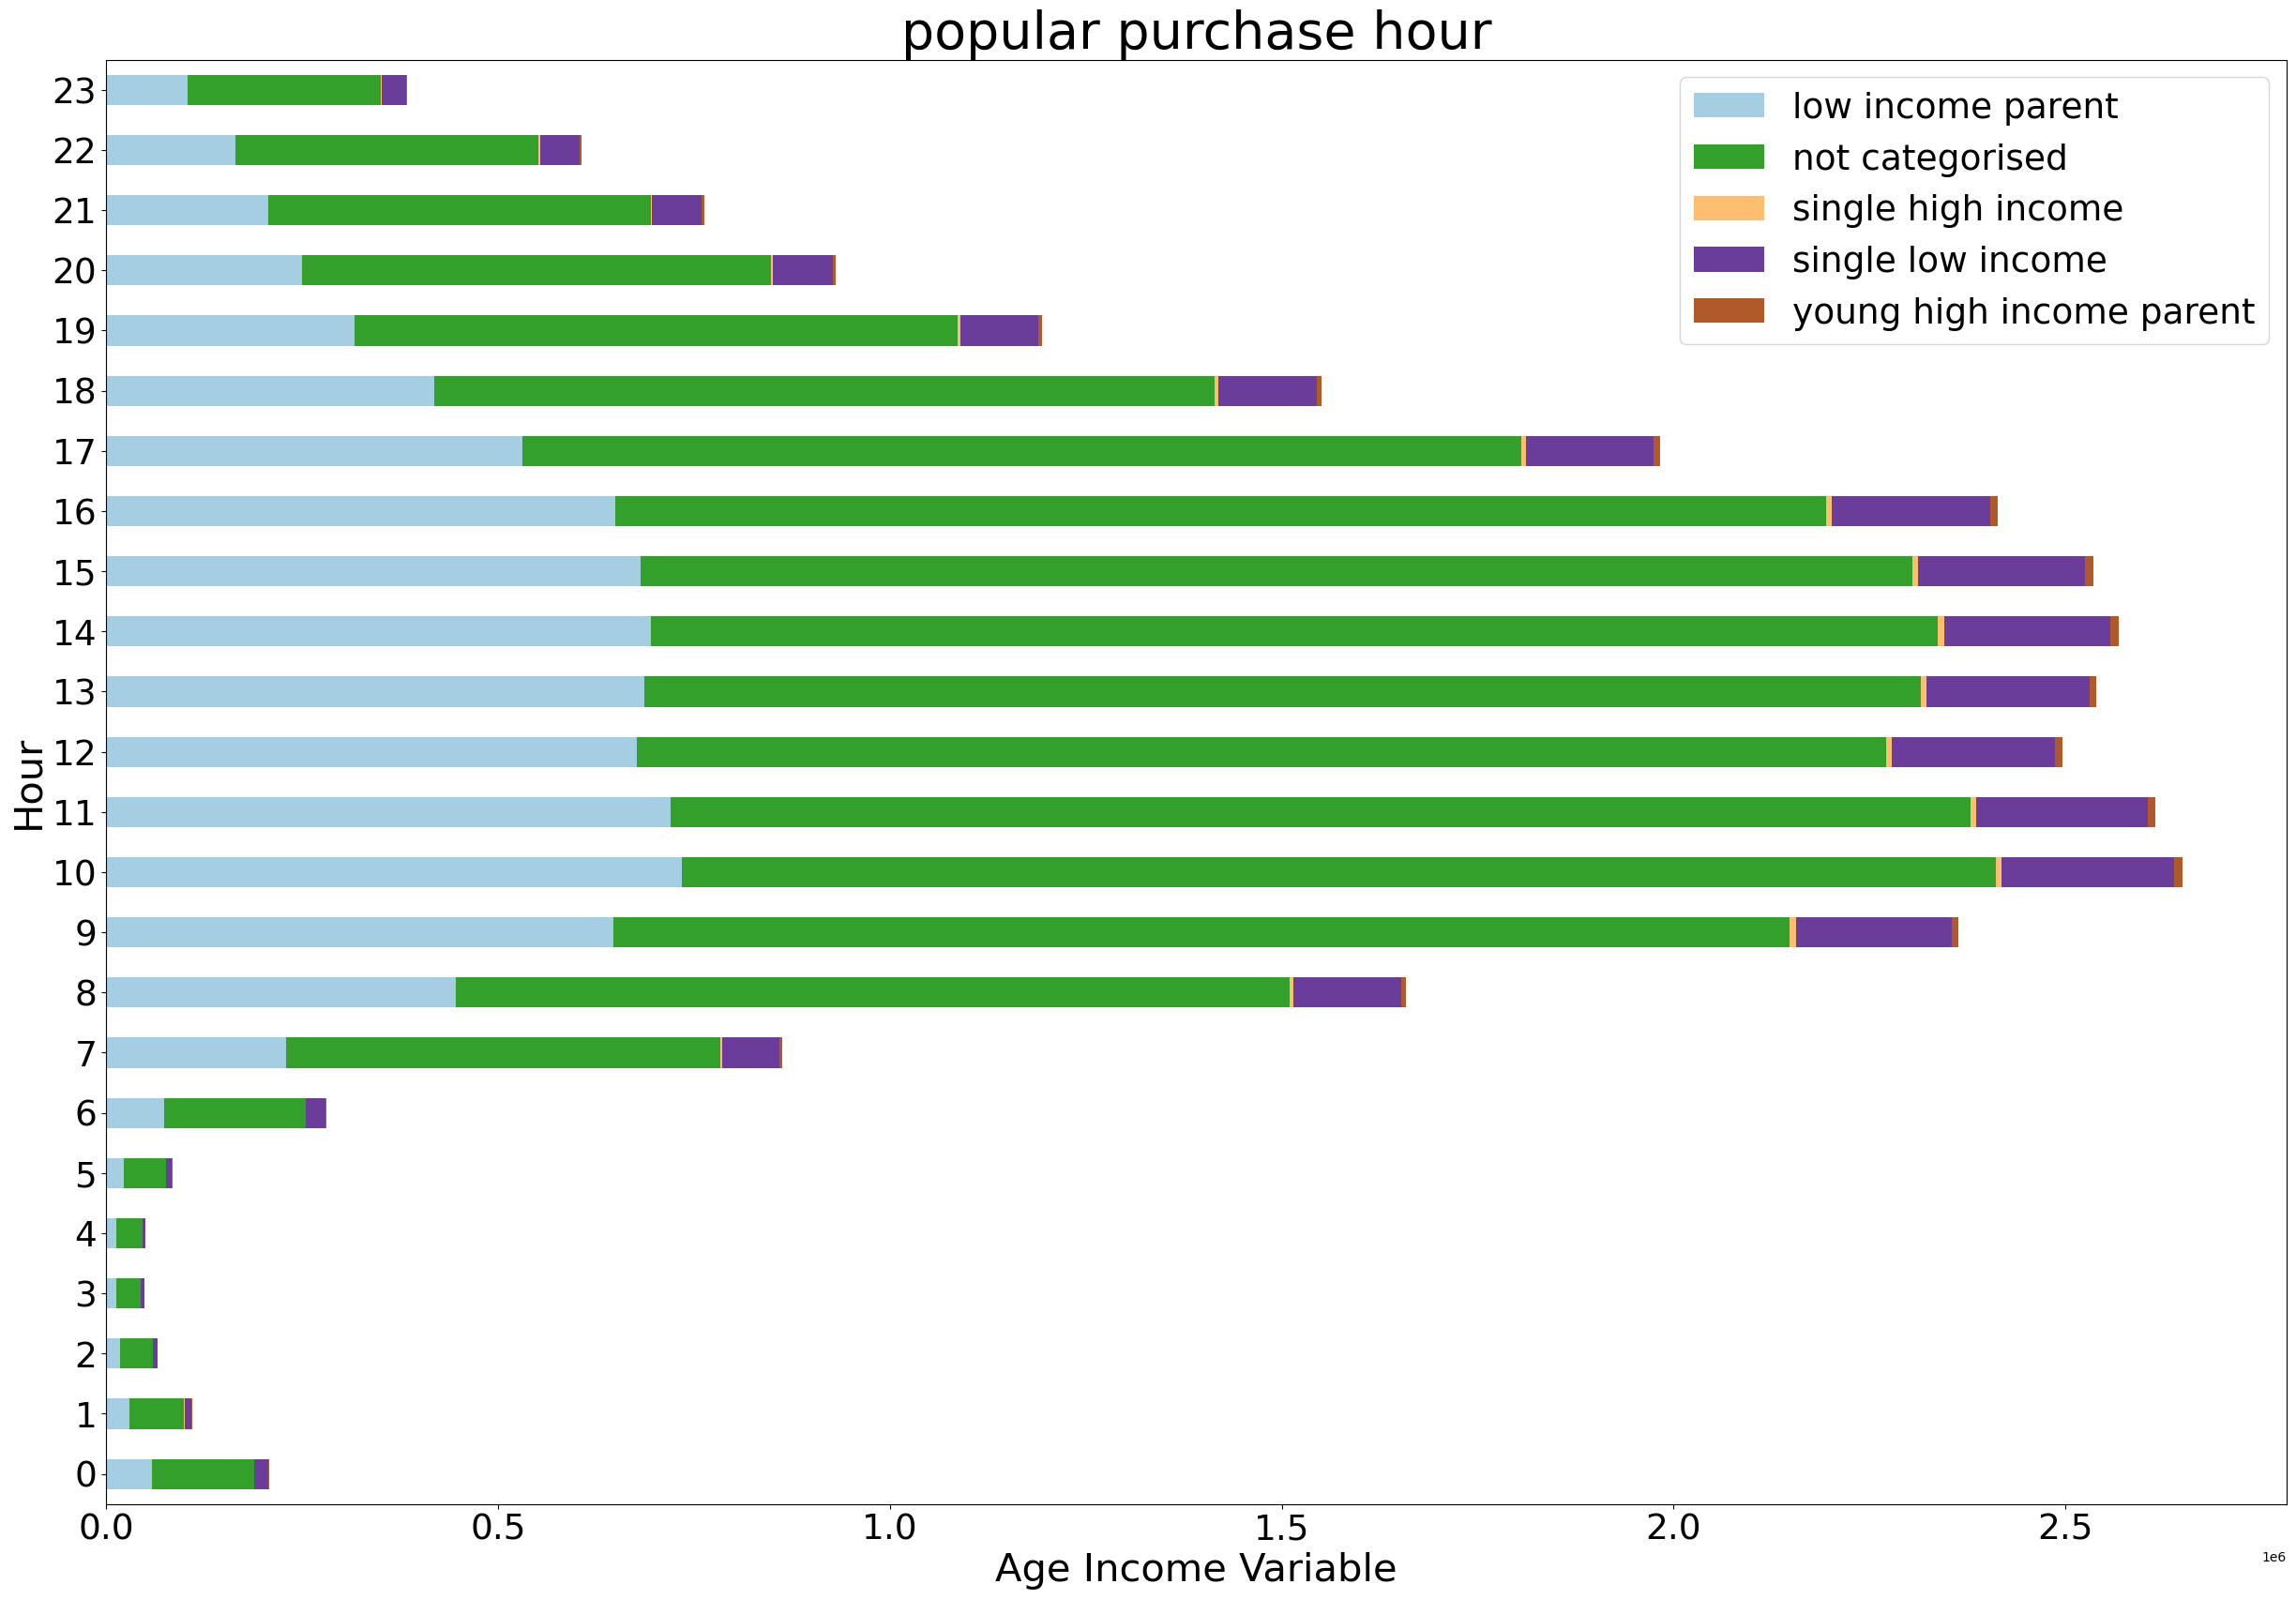

In [76]:
# visualise the relationship btw age_income_dependant_var and hour of purchase
hour_visual_bar = crosstab_3.plot.barh(column=["order_hour_of_day", "age_income_dependant_var" ], stacked=True,
    figsize=(30,20),
    colormap='Paired',
    fontsize=27)
plt.title('popular purchase hour', fontsize=40)
plt.xlabel('Age Income Variable', fontsize= 30)
plt.ylabel('Hour', fontsize = 30)
plt.legend (fontsize = 27)
plt.show()

#### All groups show similar behaviour regarding purchasing hours.Between 8 am and 5 pm purchase increases with a peak at 10 am.

In [77]:
# exporting bar chart
hour_visual_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hour_visual_bar.png'))

### Step 7: Aggregating user frequency and expenditure

In [84]:
dep_data_merged.dtypes

department_id                 int64
department                   object
user_id                      object
gender                       object
state                        object
age                           int64
date_joined                  object
fam_status                   object
income                        int64
order_id                      int64
order_number                  int64
orders_day_of_week            int64
order_hour_of_day             int64
last_order_in_days          float64
product_id                    int64
add_to_cart_order             int64
reordered                     int64
product_name                 object
aisle_id                      int64
prices                      float64
price_range_loc              object
busiest_day                  object
Busiest_days                 object
busiest_period_of_day        object
max_order                     int64
loyalty_flag                 object
average_price               float64
spending_flag               

In [83]:
# Aggregating expenditure: max, mean and min
agg_prices = dep_data_merged.groupby('age_income_dependant_var').agg({'prices': ['mean', 'min', 'max']})

In [80]:
agg_prices

prices              
                                mean  min      max
age_income_dependant_var                          
low income parent           8.111552  1.0  99999.0
not categorised            12.648633  1.0  99999.0
single high income        123.532066  1.0  99999.0
single low income           8.057992  1.0  99999.0
young high income parent  157.866094  1.0  99999.0

In [81]:
# Aggregating user frequency: max, mean and min
agg_freq = dep_data_merged.groupby('age_income_dependant_var').agg({'max_order': ['mean', 'min', 'max']})

In [82]:
agg_freq

max_order        
                               mean min max
age_income_dependant_var                   
low income parent         34.242944   5  99
not categorised           34.529314   5  99
single high income        35.081284   5  99
single low income         34.273840   5  99
young high income parent  32.896602   5  99

In [85]:
# Aggregating user frequency 2: max, mean and min
agg_freq_2 = dep_data_merged.groupby('age_income_dependant_var').agg({'last_order_in_days': ['mean', 'min', 'max']})

In [86]:
agg_freq_2

last_order_in_days           
                                       mean  min   max
age_income_dependant_var                              
low income parent                 10.850114  0.0  30.0
not categorised                   10.780764  0.0  30.0
single high income                10.531176  0.0  30.0
single low income                 10.909090  0.0  30.0
young high income parent          10.990302  0.0  30.0

### Step 8: Comparing customer profile with regions

In [5]:
# Importing dataframe
dep_data_merged = pd.read_pickle(os.path.join(path, '01 Project Management', 'Prepared Data','dep_data_merged.pkl'))

In [4]:
# grouping the data by age_income_dependant_var and regions
df_comp_reg= dep_data_merged.groupby(['region']).agg({'age_income_dependant_var': 'value_counts'})

In [5]:
df_comp_reg.head(40)

age_income_dependant_var
region     age_income_dependant_var                          
Midwest    not categorised                            4715902
           low income parent                          1899779
           single low income                           592194
           young high income parent                     29000
           single high income                           24638
North East not categorised                            3514730
           low income parent                          1461795
           single low income                           459092
           young high income parent                     17574
           single high income                           11494
South      not categorised                            6508885
           low income parent                          2848744
           single low income                           874600
           young high income parent                     47003
           single high income                           31907
West       not categorised                            5048182
           low income parent                          2181040
           single low income                           647099
           young high income parent                     28041
           single high income                           22865

In [11]:
# crosstab of region and age_income_dependant_var
crosstab_4 = pd.crosstab(dep_data_merged['region'], dep_data_merged['age_income_dependant_var'], dropna = False)

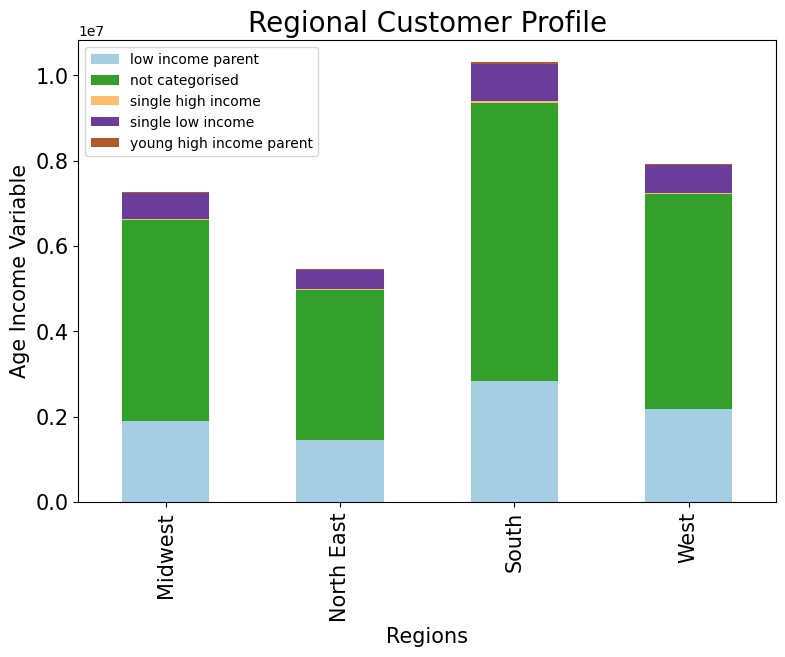

In [26]:
# visualise the relationship btw age_income_dependant_var and region
reg_visual_bar = crosstab_4.plot.bar(column=["region", "age_income_dependant_var" ], stacked=True,
    figsize=(9,6),
    colormap='Paired',
    fontsize=15)
plt.title('Regional Customer Profile', fontsize=20)
plt.xlabel('Regions', fontsize = 15)
plt.ylabel('Age Income Variable', fontsize = 15)
plt.legend (fontsize = 10)
plt.show()

#### The number of Low income parents and single low income customers are higher in the South.
#### The number of single high income customers and young high income parents are almost the same across regions. 

In [27]:
# exporting bar chart
reg_visual_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'reg_visual_bar.png'))

#### Which group spends the highest?

In [ ]:
# crosstab of age_income_dependant_variable and prices
crosstab_5 = pd.crosstab(dep_data_merged['age_income_dependant_var'], dep_data_merged['prices'], dropna = False)

In [6]:
# Aggregating prices
agg_prices = dep_data_merged.groupby('age_income_dependant_var').agg({'prices': ['sum']})

In [7]:
agg_prices

,prices
,sum
age_income_dependant_var,
low income parent,68066934.4
not categorised,250287337.0
single high income,11229558.9
single low income,20733092.7
young high income parent,19199358.6


Text(0.5, 1.0, 'Highest Spenders')

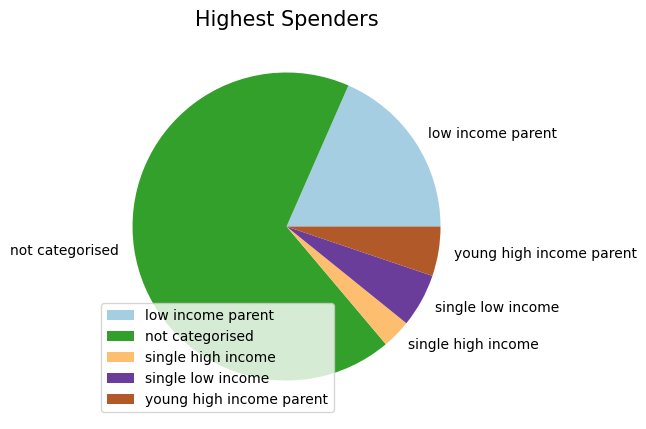

In [12]:
pie_price = agg_prices.plot.pie(y='prices', figsize=(5, 5), colormap= 'Paired')
plt.ylabel('')
plt.title('Highest Spenders',fontsize=15)

#### Low income parents are among the highest spenders in our customer profile.

In [13]:
# exporting pie chart
pie_price.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pie_price.png'))

In [28]:
# exporting the final dataframe
dep_data_merged.to_pickle(os.path.join(path, '01 Project Management', 'Prepared Data', 'Final_df_4_10.pkl'))

### Answeing Remaining Key Questions

#### Key Question 3: Price Flag

In [3]:
# Importing dataframe
final_df= pd.read_pickle(os.path.join(path, '01 Project Management', 'Prepared Data','Final_df_4_10.pkl'))

In [6]:
# Creating price_flag using loc
final_df.loc[final_df['prices'] < 15, 'price_flag'] = 'cheap'

In [7]:
final_df.loc[(final_df['prices'] >= 15) & (final_df['prices'] <= 35), 'price_flag'] = 'mid range price'

In [8]:
final_df.loc[final_df['prices'] > 35, 'price_flag'] = 'expensive'

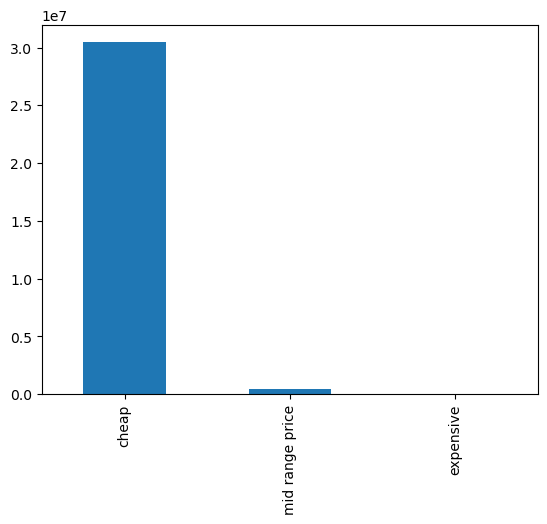

In [23]:
# Create a bar Chart 
bar_price_flag = final_df['price_flag'].value_counts().plot.bar()

In [24]:
# exporting bar chart
bar_price_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_price_flag.png'))

In [26]:
# department frequency
final_df['price_flag'].value_counts(dropna = False)

cheap              30473619
mid range price      486068
expensive              4877
Name: price_flag, dtype: int64

#### Cheap products comprise the majority of products with a total order of 30473619.

#### Key Question 4: Frequency of the Departments

In [27]:
# department frequency
final_df['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

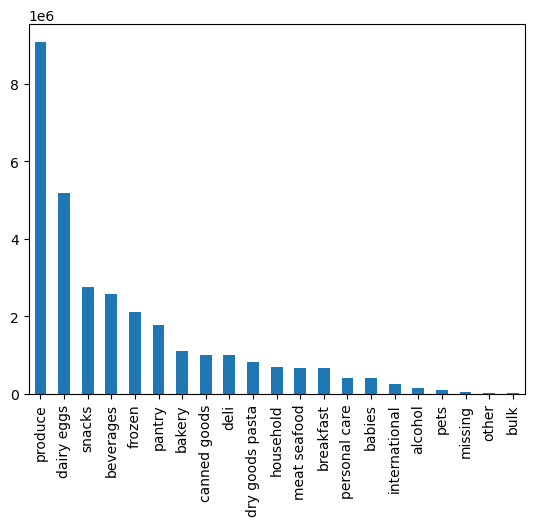

In [28]:
# Create a bar Chart 
bar_dep_counts = final_df['department'].value_counts().plot.bar()

#### Produce and dairy eggs are the most popular departments.

In [29]:
# exporting bar chart
bar_dep_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_dep_counts.png'))

#### Key Question 5: Order frequency 

In [4]:
final_df['order_frequency_flag'].value_counts(dropna = False)

Frequent customer        21204476
Regular customer          6865113
Non-frequent customer     2894975
Name: order_frequency_flag, dtype: int64

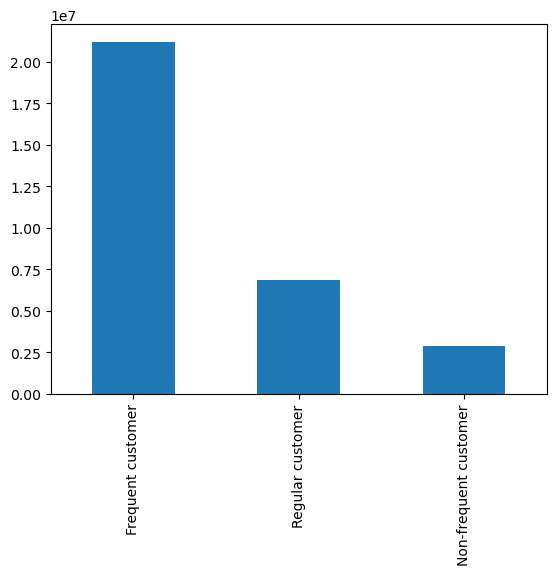

In [5]:
# Create a bar Chart 
bar_ord_freq = final_df['order_frequency_flag'].value_counts().plot.bar()

In [6]:
# exporting bar chart
bar_ord_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_ord_freq.png'))

In [30]:
# exporting the final dataframe
final_df.to_pickle(os.path.join(path, '01 Project Management', 'Prepared Data', 'Final_df_4_10_key.pkl'))